In [ ]:
#Dependencies
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [ ]:
# Read the csv file into a pandas DataFrame
stroke = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
stroke = stroke.drop(stroke[stroke.gender == "Other"].index)
stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
stroke.gender=stroke.gender.eq('Male').mul(1)
stroke.ever_married=stroke.ever_married.eq('Yes').mul(1)
stroke.Residence_type=stroke.Residence_type.eq('Urban').mul(1)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(stroke[['work_type']]).toarray())
# merge with main df bridge_df on key values
stroke = stroke.join(enc_df)
# stroke.tail(10)
#0=Never_worked , 1=Govt_job,2=private, 3=Self-Epmplu ,4=Children 
stroke.rename(columns={0: 'Govt_job',1: 'Never_worked',2: 'private',3:'Self-employed',4:'children'}, inplace=True)

In [ ]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,private,Self-employed,children
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,0.0,0.0,1.0,0.0,0.0
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1,0.0,0.0,0.0,1.0,0.0
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,0.0,0.0,1.0,0.0,0.0
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0.0,0.0,1.0,0.0,0.0
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0.0,0.0,0.0,1.0,0.0


In [ ]:
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_2df = pd.DataFrame(enc.fit_transform(stroke[['smoking_status']]).toarray())
# merge with main df bridge_df on key values
stroke = stroke.join(enc_2df)
# stroke.tail(10)
#0=Unknown , 1=formerly smoked,2=never smoked, 3=smokes 
stroke.rename(columns={0: 'Unknown',1: 'formerly_smoked',2: 'never_smoked',3:'smokes'}, inplace=True)

In [ ]:
stroke=stroke.drop(['work_type',"smoking_status","id","Unknown"], axis = 1)
stroke =stroke.dropna()
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,private,Self-employed,children,formerly_smoked,never_smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,80.0,0,1,1,0,105.92,32.5,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,49.0,0,0,1,1,171.23,34.4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,79.0,1,0,1,0,174.12,24.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,1,81.0,0,0,1,1,186.21,29.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Select our independent X variables, and our dependent y variable. 
X = stroke.drop(columns = ['stroke'])
y = stroke['stroke']

In [ ]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,private,Self-employed,children,formerly_smoked,never_smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,80.0,0,1,1,0,105.92,32.5,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,49.0,0,0,1,1,171.23,34.4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,79.0,1,0,1,0,174.12,24.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,1,81.0,0,0,1,1,186.21,29.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Confirm independent variable data types are numeric

### BEGIN SOLUTION
print(X.columns)
print(X.dtypes.unique())
### END SOLUTION

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'Govt_job',
       'Never_worked', 'private', 'Self-employed', 'children',
       'formerly_smoked', 'never_smoked', 'smokes'],
      dtype='object')
[dtype('int64') dtype('float64')]


In [ ]:
# Create our Validation training and testing datasets.

### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LogisticRegression(solver='liblinear',class_weight='balanced')
model.fit(X_train, y_train)
LogisticRegression(solver='liblinear')
y_pred = model.predict(X_test)


### END SOLUTION

In [ ]:
print(f'Accuracy: {model.score(X_test, y_test)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Correctly Classified: {accuracy_score(y_test, y_pred, normalize=False)}')
print(f'Total Test Records: {y_test.count()}')

Accuracy: 0.7556008146639511
Accuracy: 0.7556008146639511
Correctly Classified: 742
Total Test Records: 982


In [ ]:
df = pd.DataFrame({"Predicted": y_pred, "Actual": y_test})
df.head()

,Predicted,Actual
4856,0,0
3709,0,0
964,1,0
2971,0,0
3262,0,0


In [ ]:
stroke.stroke.value_counts()

0    4698
1     209
Name: stroke, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


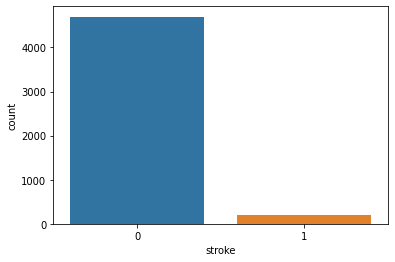

In [ ]:
import seaborn as sns
sns.countplot(stroke['stroke']);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



gender
Accuracy: 0.5845213849287169
Accuracy: 0.5845213849287169

age
Accuracy: 0.7281059063136456
Accuracy: 0.7281059063136456


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



hypertension
Accuracy: 0.8879837067209776
Accuracy: 0.8879837067209776

heart_disease
Accuracy: 0.9185336048879837
Accuracy: 0.9185336048879837

ever_married
Accuracy: 0.40122199592668023
Accuracy: 0.40122199592668023


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Residence_type
Accuracy: 0.4969450101832994
Accuracy: 0.4969450101832994

avg_glucose_level
Accuracy: 0.7657841140529531
Accuracy: 0.7657841140529531

bmi
Accuracy: 0.5926680244399185
Accuracy: 0.5926680244399185


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Govt_job
Accuracy: 0.8319755600814664
Accuracy: 0.8319755600814664

Never_worked
Accuracy: 0.05804480651731161
Accuracy: 0.05804480651731161

private
Accuracy: 0.45723014256619143
Accuracy: 0.45723014256619143


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Self-employed
Accuracy: 0.8034623217922607
Accuracy: 0.8034623217922607

children
Accuracy: 0.19653767820773932
Accuracy: 0.19653767820773932

formerly_smoked
Accuracy: 0.8024439918533605
Accuracy: 0.8024439918533605


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



never_smoked
Accuracy: 0.6171079429735234
Accuracy: 0.6171079429735234

smokes
Accuracy: 0.814663951120163
Accuracy: 0.814663951120163


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


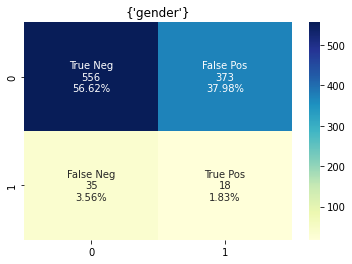

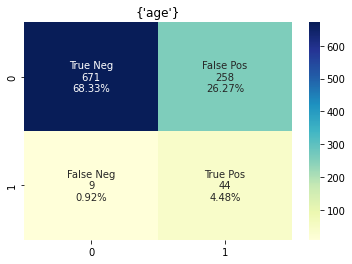

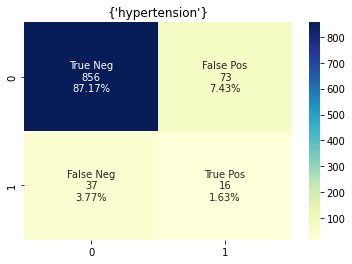

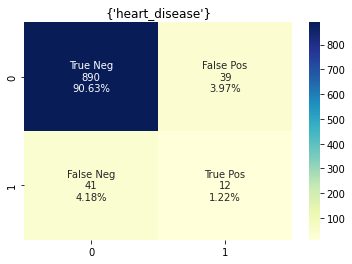

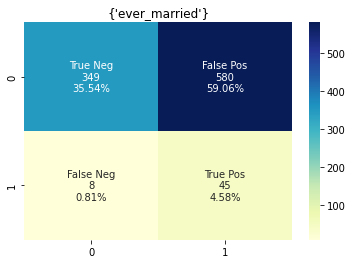

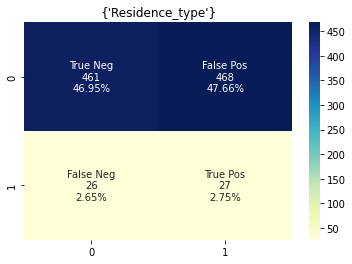

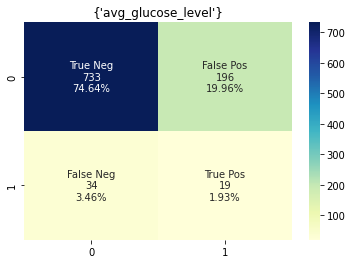

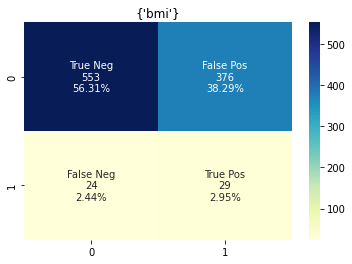

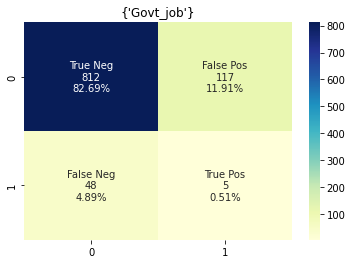

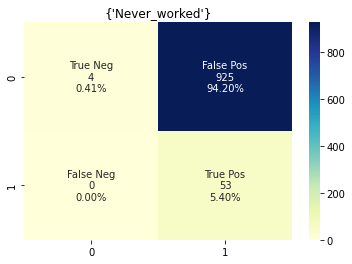

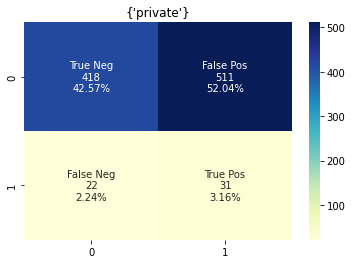

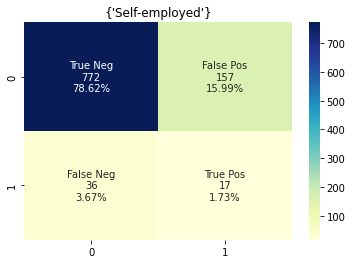

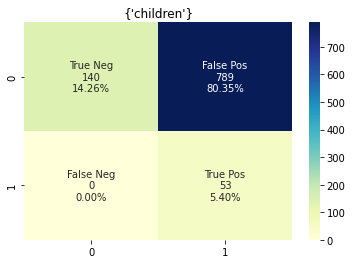

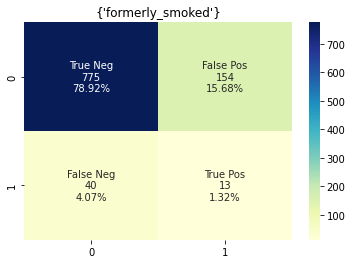

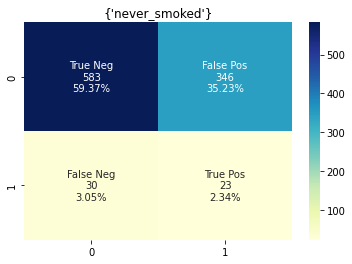

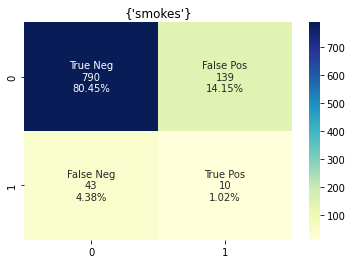

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LogisticRegression(solver='liblinear', class_weight='balanced')

for col in X.columns:
    print(f'\n{col}')
    model.fit(X_train[col].values.reshape(-1,1), y_train.values.reshape(-1,1))
    y_pred = model.predict(X_test[col].values.reshape(-1,1))
    print(f'Accuracy: {model.score(X_test[col].values.reshape(-1,1), y_test.values.reshape(-1,1))}')
    print(f'Accuracy: {accuracy_score(y_pred.reshape(-1,1), y_test.values.reshape(-1,1))}')
    cnf_matrix = metrics.confusion_matrix(y_test.values.reshape(-1,1), y_pred.reshape(-1,1))

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cnf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(-2,2)

    fig, ax = plt.subplots()
    sns.heatmap(cnf_matrix, annot=labels, cmap="YlGnBu" ,fmt='')
    plt.title({col}, y=1.1)